In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import base

from sklearn import pipeline
from functools import partial
from skopt import space
from skopt import gp_minimize

In [83]:
df = pd.read_csv('../My Python Stuff/Задача 1/Прогнозирование пролонгации/Данные для задачи.txt',sep=";")

In [84]:
df.head()

,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,TRAIN,1,1,1,1,39,1,Москва,51,12,...,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
1,TRAIN,2,1,1,1,50,5,Москва,35,7,...,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
2,TRAIN,3,1,1,1,52,6,Москва,41,6,...,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
3,TRAIN,4,1,1,1,50,5,Москва,36,12,...,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
4,TRAIN,5,1,1,0,52,6,Санкт-Петербург,42,5,...,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63300 entries, 1 to 96603
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   POLICY_IS_RENEWED              63300 non-null  int64  
 1   POLICY_SALES_CHANNEL           63300 non-null  int64  
 2   POLICY_SALES_CHANNEL_GROUP     63300 non-null  int64  
 3   POLICY_BRANCH                  63300 non-null  object 
 4   POLICY_MIN_AGE                 63300 non-null  int64  
 5   POLICY_MIN_DRIVING_EXPERIENCE  63300 non-null  int64  
 6   VEHICLE_ENGINE_POWER           63300 non-null  float64
 7   VEHICLE_IN_CREDIT              63300 non-null  int64  
 8   VEHICLE_SUM_INSURED            63300 non-null  float64
 9   INSURER_GENDER                 63300 non-null  object 
 10  POLICY_CLM_N                   63300 non-null  object 
 11  CLIENT_HAS_DAGO                63300 non-null  int64  
 12  CLIENT_HAS_OSAGO               63300 non-null 

In [6]:
df.describe()

,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,VEHICLE_ENGINE_POWER,VEHICLE_IN_CREDIT,VEHICLE_SUM_INSURED,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_DEDUCT_VALUE,POLICY_PRICE_CHANGE
count,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,9.660500e+04,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000,96605.000000
mean,48303.000000,6.891393,6.870400,0.500761,47.345251,5.123265,42.580767,34.910357,154.195851,0.321950,9.806700e+05,0.277480,0.550303,0.001014,3.877110,0.007660,5974.134461,-0.033025
std,27887.605715,3.400597,3.403665,0.500002,14.034159,1.585213,10.694670,199.928966,54.117543,0.467226,6.900919e+05,0.447758,0.497466,0.031834,17.635091,0.087186,10418.697183,0.857995
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,24152.000000,4.000000,4.000000,0.000000,50.000000,5.000000,34.000000,8.000000,123.000000,0.000000,5.584960e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.170000
50%,48303.000000,7.000000,7.000000,1.000000,52.000000,6.000000,41.000000,14.000000,146.000000,0.000000,8.090000e+05,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72454.000000,10.000000,10.000000,1.000000,53.000000,6.000000,50.000000,19.000000,171.000000,1.000000,1.163900e+06,1.000000,1.000000,0.000000,0.000000,0.000000,10000.000000,0.050000
max,96605.000000,12.000000,12.000000,1.000000,63.000000,8.000000,86.000000,2015.000000,2000.000000,1.000000,9.449000e+06,1.000000,1.000000,1.000000,737.000000,1.000000,120873.000000,60.020000


In [37]:
df.nunique()

POLICY_IS_RENEWED                    2
POLICY_SALES_CHANNEL                61
POLICY_SALES_CHANNEL_GROUP           8
POLICY_BRANCH                        2
POLICY_MIN_AGE                      68
POLICY_MIN_DRIVING_EXPERIENCE       60
VEHICLE_ENGINE_POWER               194
VEHICLE_IN_CREDIT                    2
VEHICLE_SUM_INSURED              34898
INSURER_GENDER                       2
POLICY_CLM_N                         6
CLIENT_HAS_DAGO                      2
CLIENT_HAS_OSAGO                     2
POLICY_COURT_SIGN                    2
POLICY_HAS_COMPLAINTS                2
POLICY_YEARS_RENEWED_N              10
POLICY_DEDUCT_VALUE                188
CLIENT_REGISTRATION_REGION          82
POLICY_PRICE_CHANGE                417
dtype: int64

In [8]:
df.columns

Index(['DATA_TYPE', 'POLICY_ID', 'POLICY_BEGIN_MONTH', 'POLICY_END_MONTH',
       'POLICY_IS_RENEWED', 'POLICY_SALES_CHANNEL',
       'POLICY_SALES_CHANNEL_GROUP', 'POLICY_BRANCH', 'POLICY_MIN_AGE',
       'POLICY_MIN_DRIVING_EXPERIENCE', 'VEHICLE_MAKE', 'VEHICLE_MODEL',
       'VEHICLE_ENGINE_POWER', 'VEHICLE_IN_CREDIT', 'VEHICLE_SUM_INSURED',
       'POLICY_INTERMEDIARY', 'INSURER_GENDER', 'POLICY_CLM_N',
       'POLICY_CLM_GLT_N', 'POLICY_PRV_CLM_N', 'POLICY_PRV_CLM_GLT_N',
       'CLIENT_HAS_DAGO', 'CLIENT_HAS_OSAGO', 'POLICY_COURT_SIGN',
       'CLAIM_AVG_ACC_ST_PRD', 'POLICY_HAS_COMPLAINTS',
       'POLICY_YEARS_RENEWED_N', 'POLICY_DEDUCT_VALUE',
       'CLIENT_REGISTRATION_REGION', 'POLICY_PRICE_CHANGE'],
      dtype='object')

In [9]:
df = df.drop('POLICY_ID',axis=1)

In [10]:
df= df.drop('DATA_TYPE',axis=1)

In [11]:
df = df[~df['POLICY_YEARS_RENEWED_N'].isin(['N'])]

In [12]:
df.loc[df['VEHICLE_ENGINE_POWER']>250,'VEHICLE_ENGINE_POWER'] = df[df['VEHICLE_ENGINE_POWER']>250]['VEHICLE_ENGINE_POWER'].apply(lambda x:df['VEHICLE_ENGINE_POWER'].mean())

In [13]:
df.loc[df['POLICY_MIN_DRIVING_EXPERIENCE']>60,'POLICY_MIN_DRIVING_EXPERIENCE'] = df[df['POLICY_MIN_DRIVING_EXPERIENCE']>60]['POLICY_MIN_DRIVING_EXPERIENCE'].apply(lambda x: 2021-x)

In [14]:
df = df.drop('POLICY_INTERMEDIARY',axis=1)

In [15]:
df = df.drop('VEHICLE_MODEL',axis=1)

In [16]:
df['CLAIM_AVG_ACC_ST_PRD'].value_counts()

0.000000      75027
1.000000       2406
2.000000       1597
3.000000       1427
4.000000       1309
              ...  
335.000000        1
187.666667        1
4.857143          1
152.500000        1
287.000000        1
Name: CLAIM_AVG_ACC_ST_PRD, Length: 709, dtype: int64

In [17]:
df = df.drop('CLAIM_AVG_ACC_ST_PRD',axis=1)

In [18]:
df = df[~df['POLICY_YEARS_RENEWED_N'].isin(['N'])]

In [19]:
df = df[~df['POLICY_CLM_N'].isin(['N'])]

In [20]:
df = df[~df['POLICY_PRV_CLM_N'].isin(['N'])]

In [21]:
df = df[~df['POLICY_PRV_CLM_GLT_N'].isin(['N'])]

In [28]:
df = df.drop('VEHICLE_MAKE',axis=1)

In [38]:
df = df.drop('POLICY_CLM_N',axis=1)

In [31]:
df = df.drop('POLICY_CLM_GLT_N',axis=1)

In [32]:
df = df.drop('POLICY_PRV_CLM_N',axis=1)

In [33]:
df = df.drop('POLICY_PRV_CLM_GLT_N',axis=1)

In [34]:
df = df.drop('POLICY_BEGIN_MONTH',axis=1)

In [35]:
df = df.drop('POLICY_END_MONTH',axis=1)

In [60]:
df = df.drop('CLIENT_REGISTRATION_REGION',axis=1)

In [61]:
df.to_csv('for_model.csv')

In [62]:
df = pd.read_csv('for_model.csv')

In [63]:
df = df.drop('Unnamed: 0',axis=1)

In [64]:
X = df.drop('POLICY_IS_RENEWED',axis=1)
y = df['POLICY_IS_RENEWED']

In [65]:
X = pd.get_dummies(X,drop_first=True)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
classifier = ensemble.RandomForestClassifier(n_jobs=-1,
                                             max_depth=14,
                                             n_estimators=1099,
                                             min_samples_leaf=17,
                                             criterion='entropy',
                                             max_features=0.23682242221537178)

In [68]:
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=14,
                       max_features=0.23682242221537178, min_samples_leaf=17,
                       n_estimators=1099, n_jobs=-1)

In [69]:
y_preds = classifier.predict(X_test)

In [70]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [71]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.67      0.31      0.43      5800
           1       0.60      0.87      0.71      6860

    accuracy                           0.61     12660
   macro avg       0.64      0.59      0.57     12660
weighted avg       0.63      0.61      0.58     12660



In [72]:
confusion_matrix(y_test,y_preds)

array([[1805, 3995],
       [ 880, 5980]], dtype=int64)

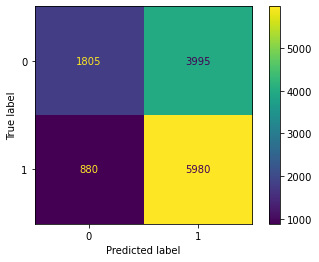

In [73]:
plot_confusion_matrix(classifier,X_test,y_test)

<AxesSubplot:>

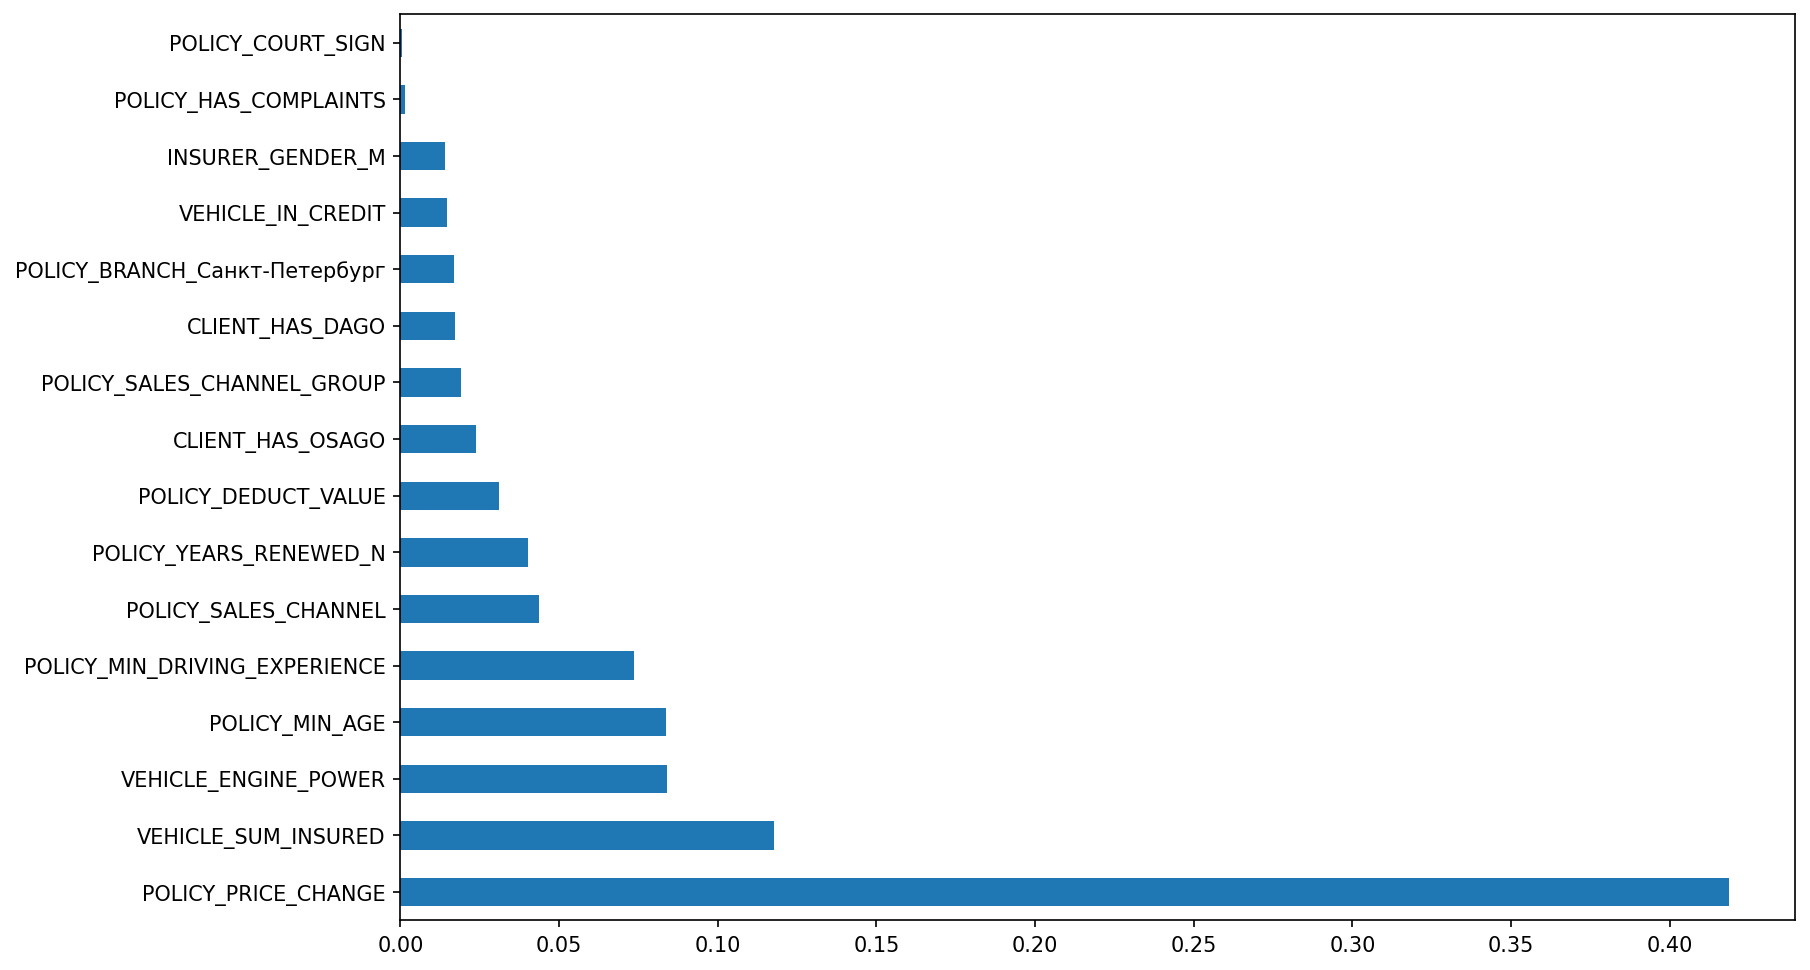

In [74]:
plt.figure(figsize=(12,8),dpi=150)
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [75]:
final_model = ensemble.RandomForestClassifier(n_jobs=-1,
                                             max_depth=14,
                                             n_estimators=1099,
                                             min_samples_leaf=17,
                                             criterion='entropy',
                                             max_features=0.23682242221537178)

In [76]:
final_model.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=14,
                       max_features=0.23682242221537178, min_samples_leaf=17,
                       n_estimators=1099, n_jobs=-1)

In [77]:
import joblib

In [78]:
joblib.dump(final_model,'final_model.pkl')

['final_model.pkl']

In [80]:
list(X.columns)

['POLICY_SALES_CHANNEL',
 'POLICY_SALES_CHANNEL_GROUP',
 'POLICY_MIN_AGE',
 'POLICY_MIN_DRIVING_EXPERIENCE',
 'VEHICLE_ENGINE_POWER',
 'VEHICLE_IN_CREDIT',
 'VEHICLE_SUM_INSURED',
 'CLIENT_HAS_DAGO',
 'CLIENT_HAS_OSAGO',
 'POLICY_COURT_SIGN',
 'POLICY_HAS_COMPLAINTS',
 'POLICY_YEARS_RENEWED_N',
 'POLICY_DEDUCT_VALUE',
 'POLICY_PRICE_CHANGE',
 'POLICY_BRANCH_Санкт-Петербург',
 'INSURER_GENDER_M']

In [81]:
joblib.dump(list(X.columns),'col_names.pkl')

['col_names.pkl']